In [131]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [132]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [133]:
dataset = '/content/drive/MyDrive/Machine Learning 2023/Dataset/data.csv'

In [134]:
img_data = pd.read_csv(dataset)

In [135]:
img_data.head(10)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,1,0,0,0,0,0,0,0,0,0,...,206,52,0,0,0,0,0,0,0,0
1,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,19,0,0,0,0,0,0,0,0,0
3,3,0,0,0,0,0,0,0,0,0,...,73,0,0,0,0,0,0,0,0,0
4,6,0,0,0,0,0,0,3,0,0,...,128,106,37,0,0,0,0,0,0,0
5,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,127,125,76,0,0,0
7,0,0,0,1,1,0,0,0,0,0,...,39,42,47,50,0,0,0,0,0,0
8,6,0,0,0,0,0,2,3,0,0,...,127,130,158,1,0,3,0,0,0,0
9,2,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,116,250,239,146,0


In [136]:
img_data.describe()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,...,70000.000000,70000.000000,70000.000000,70000.00000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,4.500000,0.000829,0.006743,0.037729,0.098371,0.242343,0.402571,0.808757,2.215843,5.649971,...,34.581886,23.268000,16.565943,17.86960,22.821271,17.894157,8.496757,2.723057,0.823229,0.069586
std,2.872302,0.088152,0.319931,1.472886,2.419523,4.360495,5.811048,8.269954,14.231137,23.754212,...,57.594114,48.882093,42.005114,43.99069,51.812432,45.146046,29.494913,17.261065,9.110774,2.099525
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,57.000000,8.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,9.000000,16.000000,45.000000,226.000000,185.000000,227.000000,230.000000,247.000000,255.000000,254.000000,...,255.000000,255.000000,255.000000,255.00000,255.000000,255.000000,255.000000,255.000000,255.000000,170.000000


In [137]:
# In this section we are trying to find out the count of different labels.
labels = img_data['label']
uni_lab, count_lab = np.unique(labels, return_counts = True)
num_lab = {label: count for label, count in zip(uni_lab, count_lab)}
print(f"{'Label No.':<12}{'Occurences':>12}")
print('-' * 25)
for label, count in num_lab.items():
    print(f"{label:<12}{count:>12}")

Label No.     Occurences
-------------------------
0                   7000
1                   7000
2                   7000
3                   7000
4                   7000
5                   7000
6                   7000
7                   7000
8                   7000
9                   7000


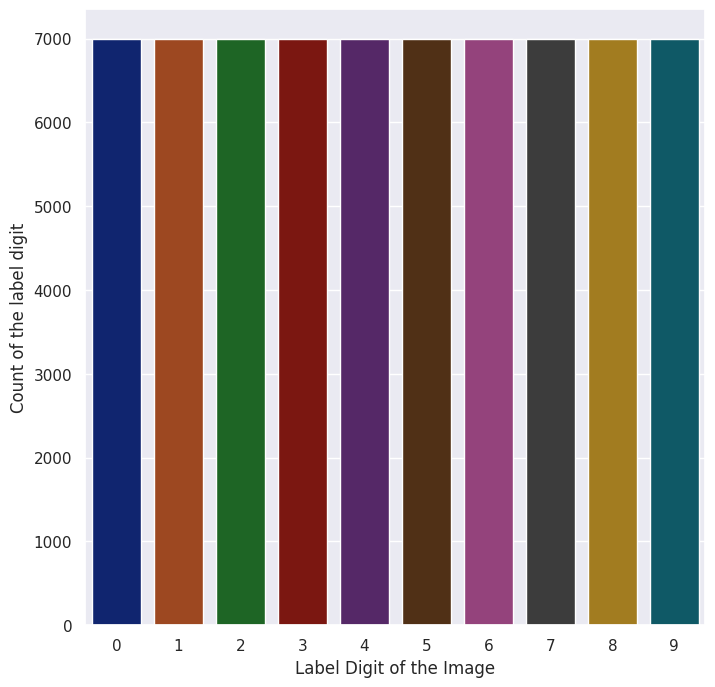

In [138]:
# This code is used to check the occurences of different labels in training dataset
import seaborn as sns
plt.figure(figsize = (8,8))
sns.countplot(x = 'label', data = img_data, palette='dark')
plt.xlabel("Label Digit of the Image")
plt.ylabel("Count of the label digit")
plt.show()

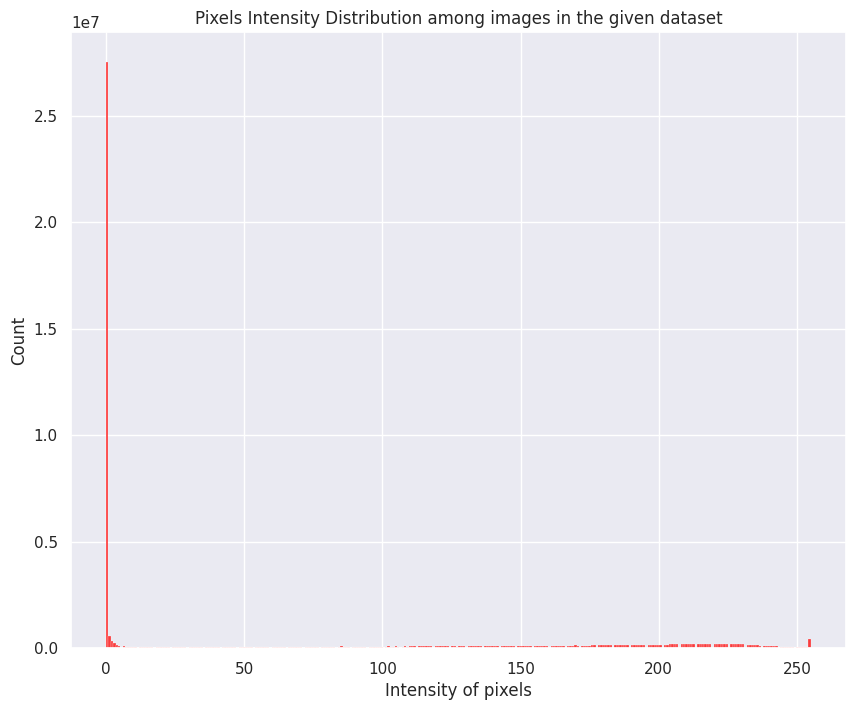

In [171]:
# Pixel Intensity Distribution Plot among all the images
import matplotlib.pyplot as plt
import seaborn as sns
B = img_data.values
pixels= B.reshape(-1)
plt.figure(figsize = (10,8))
sns.histplot(pixels, kde= False,color="red")
plt.title('Pixels Intensity Distribution among images in the given dataset')
plt.xlabel('Intensity of pixels')
plt.ylabel('Count')
plt.show()

In [140]:
# Converting the data frames into numpy arrays for our sake of easiness
y = img_data['label'].values
X = img_data.drop('label', axis =1 ).values

In [141]:
# Standardising the given dataset
mean = X.mean()
std = X.std()
X = (X-mean)/std

In [142]:
# Shuffling the datapoints, for the training purpose
ind = np.arange(img_data.shape[0])
np.random.shuffle(ind)
print(" Here are the indices of some of the shuffled datapoints:-\n\n ", ind[: 300])
shuf_lab = y[ind]
shuf_X = X[ind]

 Here are the indices of some of the shuffled datapoints:-

  [28266 60114 44874 35705 61936 38076 69824  1871 12318 37472 57606 32809
 64348  3514 21357 11538 59620 17046 39151  9784 47666 18843 38487 62242
 24301 42870 38849 43800 38517 45859 61498 38815 40752  2501 55494  1231
 40402 19359  8558 42114 31852 32472 17453 17395 12824 20462 60399 58656
 49786 13176 25699 48625 32428 43833 40783 65409 57076 33574 59706 59723
  6461 60144 57410 15723 47121 17804  8729 22523 57495 33895 42084  1094
  9629 43830 46300 25137 24728 69616 33001 67248  6082 23316 19598 20741
 51608 63410 25983 38657 36623 19490 10885 56703 27652 26379 22473 44473
 58436 64384 68303 30633 33245 66084 25277 26519 68546 37379 14599 41829
 58833 50351 33688 28971 66343 14481  6270 65796  6982 49524 38056 21820
 16062 15914 63003 38605  9418  5461 13223 69205 27067 17175 14356 44916
 12797 40940 39321  9497 49414 27632  3890 12413 65089 49207 51757 67851
 46850 22852 48345 65065 23235 21026 36886 41557 40293 16831 6

In [143]:
# Splitting the whole dataset into the training and test subset of dataset
split = float(input("Enter the split ratio, (e.g if split is 70:30, give input as ~~ 0.7 ~~) :- "))
n_train = int(split*img_data.shape[0])
x_train = shuf_X[:n_train]
y_train = shuf_lab[:n_train]
x_test = shuf_X[n_train:]
y_test = shuf_lab[n_train:]
print(f" \nThe size of the training dataset is:- {x_train.shape} \nand that of testing dataset is {x_test.shape}")

Enter the split ratio, (e.g if split is 70:30, give input as ~~ 0.7 ~~) :- 0.9
 
The size of the training dataset is:- (63000, 784) 
and that of testing dataset is (7000, 784)


In [144]:
# Defining the architecture of the neural network as given
layer_in= 784 #Input layer has 784 neurons
layer_hidden = [128,64,32] # We have three hidden layers with 128,64,32 neurons
layer_out = 10 #Output layer has 10 neurons as we have 10 classes

In [145]:
# Initialising the weights for the architecture and setting seed value as per instructions
seed_value = int(input("Enter the last 3 digits of your roll no as seed value:- "))
np.random.seed(seed_value)
w1 = np.random.randn(layer_in, layer_hidden[0])
w2 = np.random.randn(layer_hidden[0],layer_hidden[1])
w3 = np.random.randn(layer_hidden[1],layer_hidden[2])
w4 = np.random.randn(layer_hidden[2],layer_out)


Enter the last 3 digits of your roll no as seed value:- 210


In [146]:
# Initialising the bias = 1 for the architecture of our neural network
b = 1
b1 = np.full(layer_hidden[0], b, dtype=np.float64)
b2 = np.full(layer_hidden[1], b, dtype=np.float64)
b3 = np.full(layer_hidden[2], b, dtype=np.float64)
b4 = np.full(layer_out, b, dtype=np.float64)

In [147]:
# Defining the loss function for our network
def loss_func(y_actual, y_predicted):
    y_actual = np.array(y_actual)
    y_predicted = np.array(y_predicted)
    err = 1e-20
    y_predicted = np.clip(y_predicted, err, 1 - err)
    loss = -np.sum(y_actual * np.log(y_predicted)) / len(y_actual)
    return loss

In [148]:
# Defining the activation function, Here we chosen Sigmoid function
def sigmoid(x):
  return 1/(1+np.exp(-x))

In [149]:
# For applying softmax to the output layer, we are defining it here
def softmax(x):
  y = [0]*len(x)
  for i in range(0,len(x)):
    total = np.sum(np.exp(x[i]))
    x[i] = np.exp(x[i])
    y[i] = x[i]/total
  return y

In [150]:
# Defining the feed forward function to implement it into the network
def feed_fwd(X,w1,b1,w2,b2,w3,b3,w4,b4):
  a1= np.dot(X,w1) + b1
  h1= sigmoid(a1)
  a2= np.dot(h1,w2) + b2
  h2= sigmoid(a2)
  a3= np.dot(h2,w3) + b3
  h3= sigmoid(a3)
  a4= np.dot(h3,w4) + b4
  h4= softmax(a4)
  return h1, h2, h3, h4

In [151]:
# Defining the derivative of sigmoid function
def sig_der(x):
  return sigmoid(x) * (1-sigmoid(x))

In [152]:
# Implementing the backpropagation algorithm by defining the function below:-
def backprop(h1,h2,h3,h4,w1,w2,w3,w4,ohy):
    d4 = h4 - ohy
    d3 = sig_der(h3) * np.dot(d4,w4.T)
    d2 = sig_der(h2) * np.dot(d3,w3.T)
    d1 = sig_der(h1) * np.dot(d2,w2.T)
    return d1,d2,d3,d4

In [153]:
# Gradient descent algorithm for weights updation
def grad_w(etta, w1,w2,w3,w4,del_w1,del_w2,del_w3,del_w4,batch_x):
    p  = batch_x.shape[0]
    w1 -= etta * del_w1 / p
    w2 -= etta * del_w2 / p
    w3 -= etta * del_w3 / p
    w4 -= etta * del_w4 / p
    return w1,w2,w3,w4

In [154]:
# Gradient descent algorithm for bias values updation
def grad_b(etta,b1,b2,b3,b4,d_b1,d_b2,d_b3,d_b4,batch_x):
    t = batch_x.shape[0]
    b1 -= etta * d_b1 / t
    b2 -= etta * d_b2 / t
    b3 -= etta * d_b3 / t
    b4 -= etta * d_b4 / t
    return b1,b2,b3,b4

In [155]:
# Function to update the weights and bias update using gradient descent algorithm
def grad_calc(h1,h2,h3,h4,d1,d2,d3,d4,batch_x):
    d_w4 = np.dot(h3.T,d4)
    d_w3 = np.dot(h2.T,d3)
    d_w2 = np.dot(h1.T,d2)
    d_w1 = np.dot(batch_x.T,d1)
    d_b4 = np.sum(d4,axis = 0)
    d_b3 = np.sum(d3,axis = 0)
    d_b2 = np.sum(d2,axis = 0)
    d_b1 = np.sum(d1,axis = 0)
    return d_b1,d_b2,d_b3,d_b4,d_w1,d_w2,d_w3,d_w4


In [156]:
itr = int(input("Enter the number of epochs:- "))
b_size = int(input("Enter batch size :- "))

Enter the number of epochs:- 25
Enter batch size :- 21


In [157]:
# Implementing the network by first feedforwarding, then using the
# gradient descent and updating the weights using backtracking
etta= 0.01  # Initialising the learning rate
num_batches = len(x_train) // b_size
acc_hist, loss_hist = [],[]

In [158]:
# Training the network in the given number of epochs
for i in range(itr):
  itr_loss,ccount = 0,0
    # Iterating over the batches
  for j in range(0, len(x_train), b_size):
    end = j + b_size
    if end>len(x_train):
      end = len(x_train)
    batch_x = x_train[j:end]
    batch_y = y_train[j:end]
    # Modeling the indices as one hot encoding representation by a vector
    ohy = np.eye(layer_out)[batch_y.astype(int)]
    # Feedforwarding the network
    h1,h2,h3,h4 = feed_fwd(batch_x, w1,b1,w2,b2,w3,b3,w4,b4)
    # Calculating the loss values
    loss = loss_func(h4,ohy)
    itr_loss += loss
    #Computing the accuracy of the network
    pred = np.argmax(h4,axis=1)
    ccount += np.sum(pred == batch_y)
    # Applying Backpropagation Algorithm
    d1,d2,d3,d4 = backprop(h1,h2,h3,h4,w1,w2,w3,w4,ohy)
    # Calculating the gradients
    d_b1,d_b2,d_b3,d_b4,d_w1,d_w2,d_w3,d_w4 = grad_calc(h1,h2,h3,h4,d1,d2,d3,d4,batch_x)
    # Updating the weights and bias values using the gradient descent algorithm
    w1,w2,w3,w4 = grad_w(etta, w1,w2,w3,w4,d_w1,d_w2,d_w3,d_w4,batch_x)
    b1,b2,b3,b4 = grad_b(etta,b1,b2,b3,b4,d_b1,d_b2,d_b3,d_b4,batch_x)
  itr_loss /= num_batches
  # Appending the loss after every epoch in the list
  loss_hist.append(itr_loss)
  itr_acc = ccount / len(x_train)
  # Appending the accuracy after every epoch in the list
  acc_hist.append(itr_acc)
  # Printing the Loss and Accuracy obtained after every epoch
  print(f"Epoch:{i+1}, Loss:- {itr_loss:.4f} and Accuracy:- {itr_acc*100:.2f}% ")

<ipython-input-148-0256e54624b8>:3: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-x))


Epoch:1, Loss:- 28.1362 and Accuracy:- 57.42% 
Epoch:2, Loss:- 21.5492 and Accuracy:- 67.61% 
Epoch:3, Loss:- 19.0563 and Accuracy:- 71.26% 
Epoch:4, Loss:- 17.9738 and Accuracy:- 73.31% 
Epoch:5, Loss:- 17.5856 and Accuracy:- 74.19% 
Epoch:6, Loss:- 17.3476 and Accuracy:- 74.67% 
Epoch:7, Loss:- 17.1307 and Accuracy:- 74.85% 
Epoch:8, Loss:- 16.8306 and Accuracy:- 75.10% 
Epoch:9, Loss:- 16.4584 and Accuracy:- 75.62% 
Epoch:10, Loss:- 16.0669 and Accuracy:- 75.91% 
Epoch:11, Loss:- 15.6768 and Accuracy:- 76.29% 
Epoch:12, Loss:- 15.2909 and Accuracy:- 76.80% 
Epoch:13, Loss:- 14.9457 and Accuracy:- 77.40% 
Epoch:14, Loss:- 14.6669 and Accuracy:- 77.93% 
Epoch:15, Loss:- 14.4241 and Accuracy:- 78.23% 
Epoch:16, Loss:- 14.2053 and Accuracy:- 78.55% 
Epoch:17, Loss:- 14.0412 and Accuracy:- 78.66% 
Epoch:18, Loss:- 13.9233 and Accuracy:- 78.75% 
Epoch:19, Loss:- 13.7873 and Accuracy:- 79.05% 
Epoch:20, Loss:- 13.7000 and Accuracy:- 79.09% 
Epoch:21, Loss:- 13.6387 and Accuracy:- 79.20% 
E

In [164]:
path_to_file ='/content/drive/MyDrive/Machine Learning 2023/Dataset/Parameters3.txt'
file = open(path_to_file,'w')
# Saving the array in a text file
file.write(f"\n \n The weight W1 matrix after training is \n :- {w2} ")
file.write(f"\n \n The weight W2 matrix after training is \n :- {w1} ")
file.write(f"\n \n The weight W3 matrix after training is \n :- {w3} ")
file.write(f"\n \n The weight W4 matrix after training is \n :- {w4} ")
file.write(f"\n \n The Bias value matrix b1 after training is \n :- {b1} ")
file.write(f"\n \n The Bias value matrix b2 after training is \n :- {b2} ")
file.write(f"\n \n The Bias value matrix b3 after training is \n :- {b3} ")
file.write(f"\n \n The Bias value matrix b4 after training is \n :- {b4} ")
file.close()

Text(0, 0.5, 'Values of the loss occured during the training')

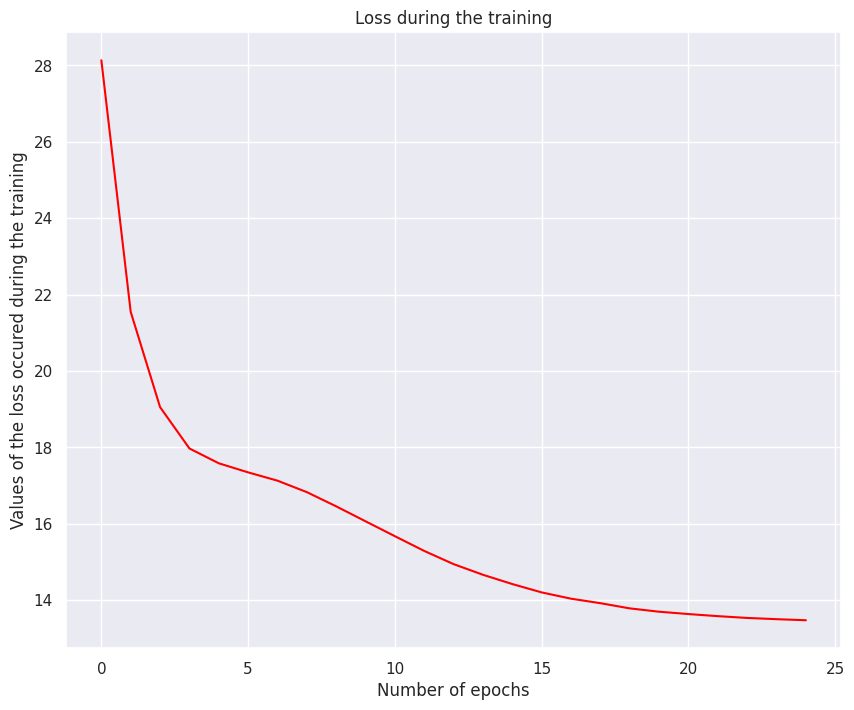

In [165]:
# Plotting the training loss curve
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
plt.plot(loss_hist, label=' Loss ', color ='red')
plt.title('Loss during the training')
plt.xlabel('Number of epochs')
plt.ylabel('Values of the loss occured during the training')

Text(0, 0.5, 'Accuracy of the model during the training')

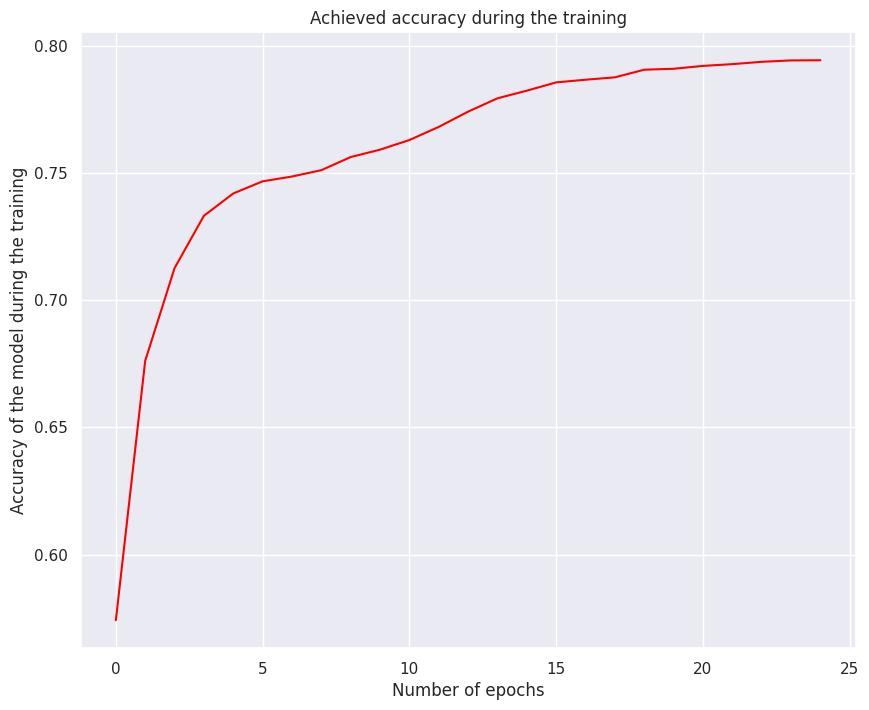

In [167]:
# Plotting the Accuracy curve, achieved during the training
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
plt.plot(acc_hist, label=' Loss ', color ='red')
plt.title('Achieved accuracy during the training')
plt.xlabel('Number of epochs')
plt.ylabel('Accuracy of the model during the training')

In [169]:
# Testing our model on a dataset
# After the training loop, evaluate the model on the test set
test_a1, test_a2, test_a3, test_a4 = feed_fwd(x_test, w1, b1, w2, b2, w3, b3, w4, b4)
test_pred = np.argmax(test_a4, axis=1)
test_acc = np.mean(test_pred == y_test)
print(f" Accuracy on the test dataset : {test_acc * 100:.5f}%")

<ipython-input-148-0256e54624b8>:3: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-x))


 Accuracy on the test dataset : 79.37143%


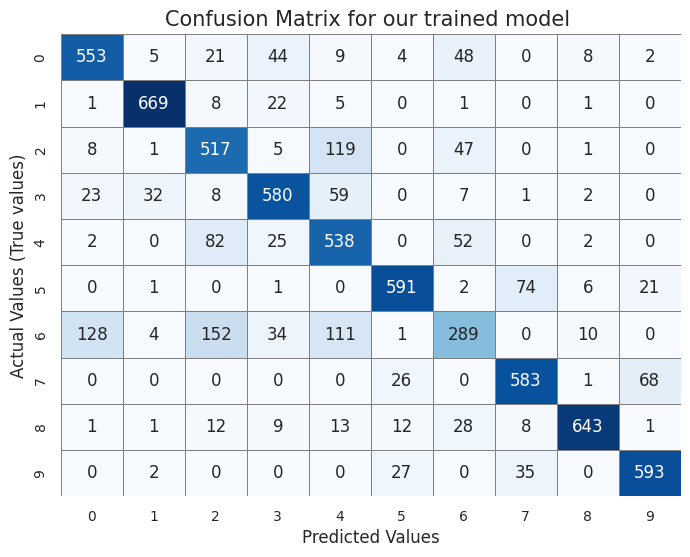

In [170]:
from sklearn.metrics import confusion_matrix
# Creating a confusion matrix
cm = confusion_matrix(y_test, test_pred)
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.0)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', linewidths=.5, linecolor='gray', cbar=False)
plt.xlabel('Predicted Values', fontsize=12)
plt.ylabel('Actual Values (True values)', fontsize=12)
plt.title('Confusion Matrix for our trained model ', fontsize=15)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()
